UPDATED! https://github.com/lunacatalan/eds220-hwk-2# Task 3

## General instructions

First, update the following cell to have a link to your Homework 2 GitHub repository

**UPDATED!** https://github.com/lunacatalan/eds220-hwk-2

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Acknowledgments

This exercise is based on this [NCEAS Learning Hub R lesson](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).

Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.

## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed here at KNB:

 [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886- 1997). Gulf of Alaska Data Portal. df35b.304.2.](https://knb.ecoinformatics.org/view/df35b.304.2)

The dataset is in a csv file in the homework's repo (salmon_data.csv) and has the following columns:

- Region: region code
- Year: year fish were caught
- notesRegCode: notes and comments
- Species: species of salmon caught
- Catch: commercial catches of salmon species (in tousands of fish)


## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

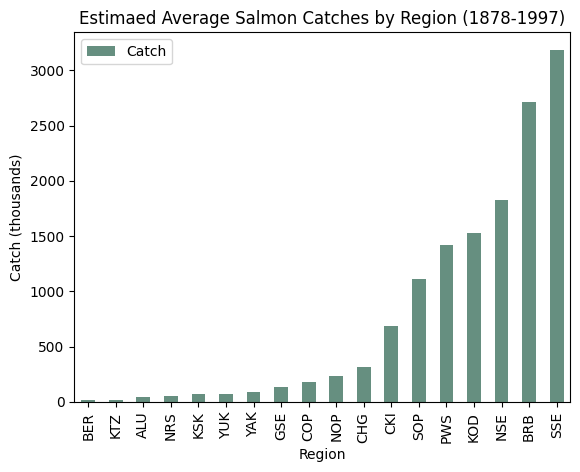

In [24]:
### ===== FINAL CODE =====

# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# read in data
catch_original = pd.read_csv("salmon_data.csv")

# drop column 
catch_original = catch_original.drop(['notesRegCode'], axis = 1)

# change value in row 400 to 1
catch_original.Catch.at[400] = 1

# make copy of data into catch_data
catch_data = catch_original.copy()

# update Catch column to type integer
catch_data['Catch'] = catch_data.Catch.astype('int64')

# group by Region, and find means 
catch_region = catch_data.groupby('Region').mean().drop(['Year'], axis = 1)

# make figure!
# set up figure environment
fig, ax = plt.subplots()

# arrange data by Catch values
catch_region = catch_region.sort_values('Catch')

# plot data using bar graph
catch_region.plot(ax = ax,
                 kind = 'bar',
                 color = '#668F80')


# update axis
ax.set_title('Estimaed Average Salmon Catches by Region (1878-1997)')
ax.set_xlabel('Region') # update x axis
ax.set_ylabel('Catch (thousands)') # update x axis

plt.show()

## 1

Import the data from the `salmon_data.csv` as `catch_original` and look at the head of the dataframe.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# read in data
catch_original = pd.read_csv("salmon_data.csv")

# see the head
catch_original.head()

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


## 2
In the next cell:
1. Print the unique values (not the number of unique values) of the `notesRegCode` column. 
2. Update the dataframe so it doesn't have the `notesRegCode` column.
3. Verify the column is no longer in the dataframe.

In [2]:
# check unique values of notesRegCode
catch_original.notesRegCode.unique()

# drop column 
catch_original = catch_original.drop(['notesRegCode'], axis = 1)

In [3]:
# check columns 
catch_original.columns

Index(['Region', 'Year', 'Species', 'Catch'], dtype='object')

## 3
In the next cell, check the data types of the columns. Does each column have the expected data type? Write your answer as a short comment in the same cell.


In [4]:
# check dtypes
catch_original.dtypes

# ANSWER: catch should be an integer since its a number 

Region     object
Year        int64
Species    object
Catch      object
dtype: object

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`.

Run the next cell and read the end of the error message closely.

In [5]:
# to use `astype` we select a specifc column
#  and then indicate the dtype we want to convert to
#  astype does not modify the column in place
catch_original.Catch.astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out this data set is from a PDF which was automatically converted into a csv and this value of 'I' is actually a 1.

In the next cell find the row(s) that is causing this issue. Show the filtered row(s) as the output.

In [6]:
# find rows where catch value is equal to I
print(catch_original[catch_original.Catch == "I"])

    Region  Year  Species Catch
400    GSE  1955  Chinook     I


## 6
In the next cell:

1. Update the value of I to 1. HINT: you could use the `at` method to access a single value in the dataframe.
2. Access the row you updated to verify the value was changed.

In [7]:
# change value in row 400 to 1
catch_original.Catch.at[400] = 1

In [8]:
# check to see if row value is changed!
catch_original[catch_original.Catch == 1]

,Region,Year,Species,Catch
400,GSE,1955,Chinook,1


## 7
In the next cell:

1. Update the Catch column in `catch_data` to be of type `int64`.
2. Check the dtypes of the columns.

In [9]:
# make copy of data into catch_data
catch_data = catch_original.copy()

# update Catch column to type integer
catch_data['Catch'] = catch_data.Catch.astype('int64')

# check to make sure Catch is now type integer
catch_data.dtypes

Region     object
Year        int64
Species    object
Catch       int64
dtype: object

## 8
Create a dataframe with the average catch per region. HINT: use `groupby()`. Store your dataframe in new variable.


In [10]:
# group by Region, and find means 
catch_region = catch_data.groupby('Region').mean().drop(['Year'], axis = 1)
catch_region

,Catch
Region,
ALU,40.383908
BER,16.372549
BRB,2709.796491
CHG,315.487273
CKI,683.571429
COP,179.223404
GSE,133.841463
KOD,1528.350000
KSK,67.642353


## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

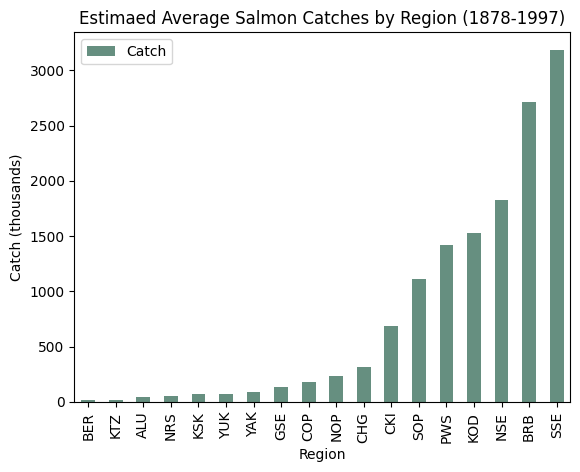

In [22]:
# set up figure environment
fig, ax = plt.subplots()

# arrange data by Catch values
catch_region = catch_region.sort_values('Catch')

# plot data using bar graph
catch_region.plot(ax = ax,
                 kind = 'bar',
                 color = '#668F80')


# update axis
ax.set_title('Estimaed Average Salmon Catches by Region (1878-1997)')
ax.set_xlabel('Region')
ax.set_ylabel('Catch (thousands)')

plt.show()

## 10

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.